<a href="https://colab.research.google.com/github/MonicaEN/Python/blob/main/Cognifyz_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Load the Dataset
df = pd.read_csv('Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9551 non-null   int64  
 1   Has Table booking     9551 non-null   object 
 2   Has Online delivery   9551 non-null   object 
 3   Is delivering now     9551 non-null   object 
 4   Switch to order menu  9551 non-null   object 
 5   Price range           9551 non-null   int64  
 6   Aggregate rating      9551 non-null   float64
 7   Rating color          9551 non-null   object 
 8   Rating text           9551 non-null   object 
 9   Votes                 9551 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 746.3+ KB
None


In [52]:
df.describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [53]:
df.isnull().sum()

,0
Average Cost for two,0
Has Table booking,0
Has Online delivery,0
Is delivering now,0
Switch to order menu,0
Price range,0
Aggregate rating,0
Rating color,0
Rating text,0
Votes,0


In [68]:
df.dropna(inplace=True)

In [54]:
df.duplicated().sum()

2871

Text(0.5, 1.0, 'PIECHART')

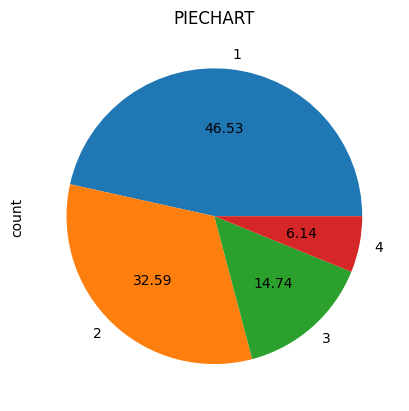

In [55]:
df['Price range'].value_counts().plot(kind='pie',autopct = '%.2f')
plt.title("PIECHART")

<Axes: xlabel='Price range', ylabel='Density'>

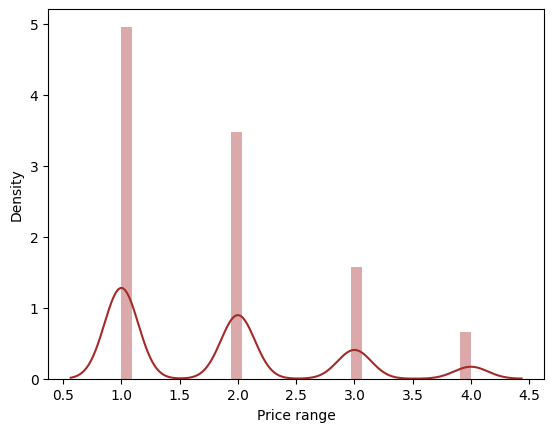

In [56]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(df['Price range'],color='brown')

In [57]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Has Table booking'] = label_encoder.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = label_encoder.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = label_encoder.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = label_encoder.fit_transform(df['Switch to order menu'])
df['Rating color'] = label_encoder.fit_transform(df['Rating color'])
df['Rating text'] = label_encoder.fit_transform(df['Rating text'])


<Axes: xlabel='Aggregate rating', ylabel='Count'>

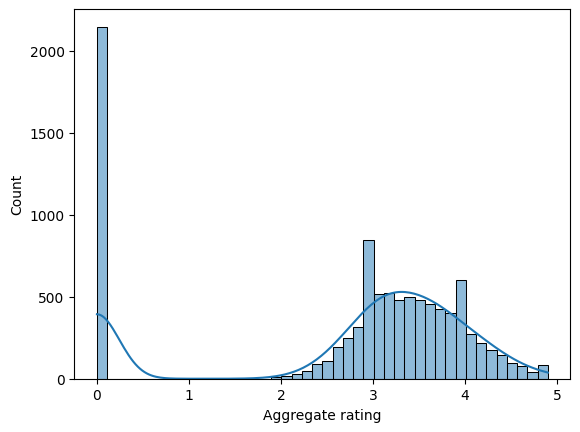

In [58]:
sns.histplot(df['Aggregate rating'], kde=True)

<Axes: xlabel='Aggregate rating', ylabel='Votes'>

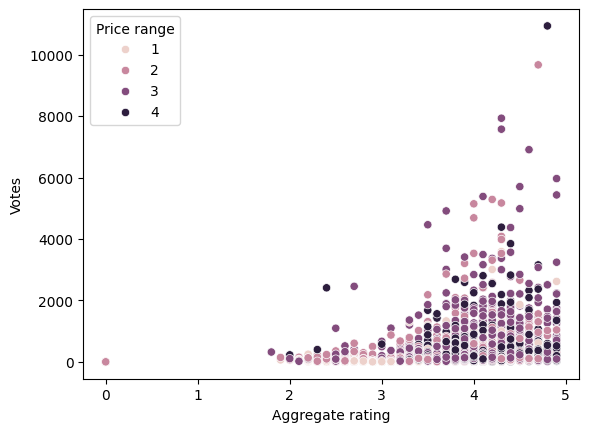

In [59]:
sns.scatterplot(x=df["Aggregate rating"],y=df["Votes"],hue=df["Price range"])

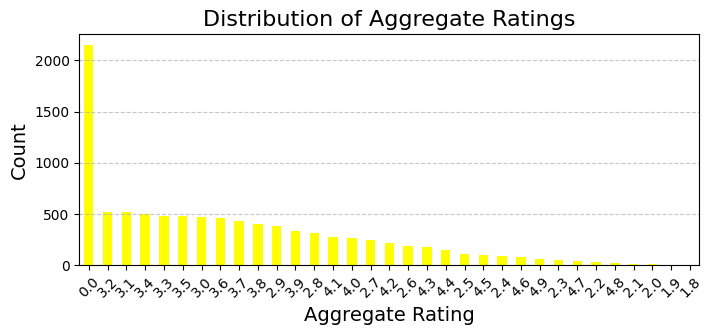

In [86]:
# Count the occurrences of each rating
rating_counts = df['Aggregate rating'].value_counts()

# Create a bar chart
plt.figure(figsize=(8,3))
rating_counts.plot(kind='bar', color='yellow')
plt.title('Distribution of Aggregate Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

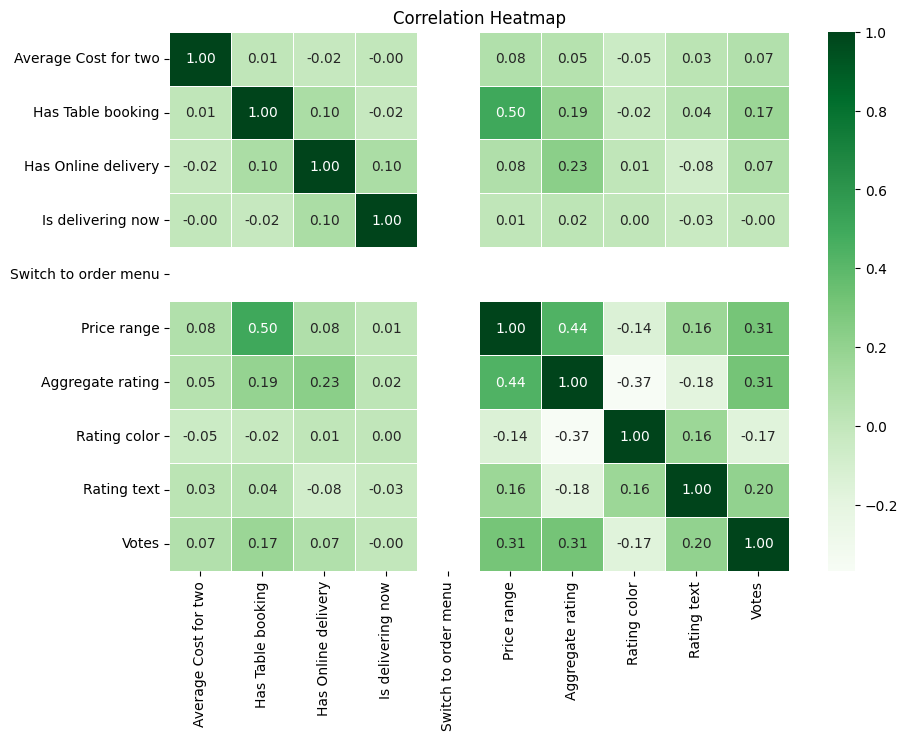

In [75]:
corrmatrix = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corrmatrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [69]:
x = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)

In [76]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [78]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Error: {r2:.2f}")

Mean Squared Error (MSE): 1.36
R-squared (R2) Error: 0.45


In [79]:
# Initialize and train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Predictions and evaluation
y_pred = model.predict(x_test)

In [81]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2 Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R2 Score: 0.98
Mean Squared Error: 0.06
